In [1]:
from model.model import EVSpaceModel
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
import seaborn as sns
import numpy as np


In [2]:
# model.peak_time

In [3]:
speed = 0.3
cfg = 'configs/west_box.yml' #'configs/east_box.yml' #'configs/Mississauga_cfg.yml' # 'configs/Point_Edward_cfg.yml' #
model = EVSpaceModel(cfg=cfg,ModelP_price_set_mechanism = 'none')  
model.run_model(2400) #24*365   
model.save()

mdf = model.datacollector.get_model_vars_dataframe()


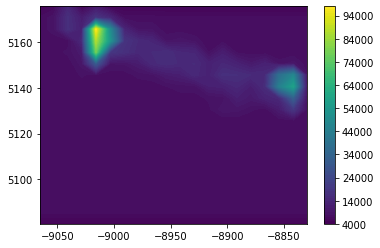

In [4]:
GP = model.datacollector_gridpoints.get_agent_vars_dataframe()
# XY = pd.DataFrame(GP['pos'].tolist()).rename({0:'X',1:'Y'},axis=1)

grid_spacing = model.cfg['agent_params']['Grid_Points']['grid_spacing']

GP_tot = GP.reset_index().groupby('AgentID').agg({'cars_passing':sum,'X':'first','Y':'first'})
# fig, ax = plt.subplots()
# sns.scatterplot(data=GP_tot, x='X',y='Y',c=GP_tot['cars_passing'])

X = GP_tot['X'].values.reshape((-1,grid_spacing))
Y = GP_tot['Y'].values.reshape((-1,grid_spacing))
Z = GP_tot['cars_passing'].values.reshape((-1,grid_spacing))

fig, ax = plt.subplots()
# cs = ax.contourf(X, Y, Z, locator=ticker.LogLocator(2))
cs = ax.contourf(X, Y, Z, 100)
# cs = ax.contourf(X, Y, Z, locator=ticker.LogLocator(2))
cbar = plt.colorbar(cs)


<AxesSubplot:xlabel='hour'>

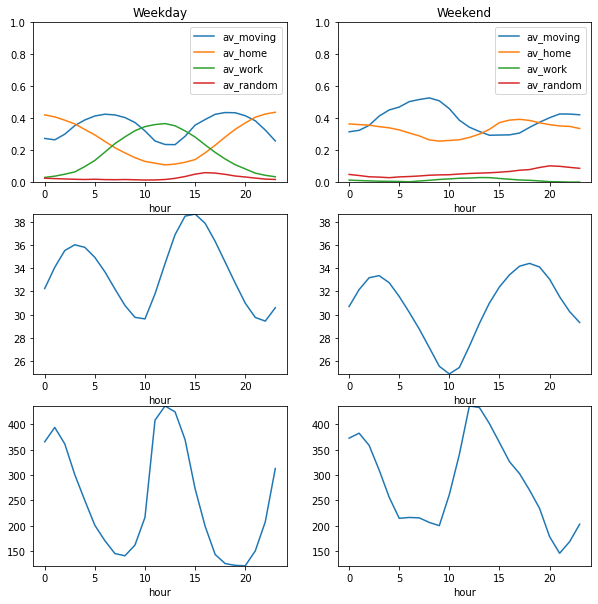

In [5]:
import pandas as pd
def is_business_day(date):
        return bool(len(pd.bdate_range(date,date)))
mdf['isbusinessday'] = [is_business_day(date) for date in mdf.date_time]
mdf['hour'] = pd.to_datetime(mdf.date_time).dt.hour
mdf=mdf[mdf['date_time']>pd.to_datetime('2022-01-03')]
hourly = mdf.groupby(['isbusinessday','hour']).mean()
mdfweekday = mdf[mdf['isbusinessday'] == True]
hourlyweekday = mdfweekday.groupby(['hour']).mean()
mdfweekend = mdf[mdf['isbusinessday'] == False]
hourlyweekend = mdfweekend.groupby(['hour']).mean()

fig, ax = plt.subplots(3,2,figsize=(10,10))

hourlyweekday[['av_moving','av_home','av_work','av_random']].plot(ax=ax[0,0],title='Weekday',ylim=(0,1))
hourlyweekday['av_charge'].plot(ax=ax[1,0],ylim=(hourly['av_charge'].min(),hourly['av_charge'].max()))
hourlyweekday['charge_load'].plot(ax=ax[2,0],ylim=(hourly['charge_load'].min(),hourly['charge_load'].max()))
hourlyweekend[['av_moving','av_home','av_work','av_random']].plot(ax=ax[0,1],title='Weekend',ylim=(0,1))
hourlyweekend['av_charge'].plot(ax=ax[1,1],ylim=(hourly['av_charge'].min(),hourly['av_charge'].max()))
hourlyweekend['charge_load'].plot(ax=ax[2,1],ylim=(hourly['charge_load'].min(),hourly['charge_load'].max()))

In [6]:
hourlyweekend

,av_charge,completed_trip,dead_cars,charge_load,av_moving,av_home,av_work,av_random,av_CP,lat,lon,seed,price,isbusinessday
hour,,,,,,,,,,,,,,
0,30.696907,1.821429,0.125000,372.746180,0.314643,0.363571,0.012500,0.047857,0.261429,46.198755,-80.37533,6097.0,0.33,0.0
1,32.162363,2.607143,0.107500,382.538597,0.323571,0.359643,0.009643,0.041071,0.266071,46.198755,-80.37533,6097.0,0.33,0.0
2,33.188704,2.571429,0.084643,358.463790,0.354643,0.356071,0.007500,0.033214,0.248571,46.198755,-80.37533,6097.0,0.33,0.0
3,33.367674,2.857143,0.070714,309.646264,0.412857,0.346786,0.005357,0.031071,0.203929,46.198755,-80.37533,6097.0,0.33,0.0
4,32.754075,2.750000,0.082857,255.889273,0.451071,0.339286,0.004643,0.027500,0.177500,46.198755,-80.37533,6097.0,0.33,0.0
5,31.566076,3.285714,0.081071,214.269196,0.469286,0.326429,0.003929,0.032500,0.167857,46.198755,-80.37533,6097.0,0.33,0.0
6,30.194733,3.035714,0.067857,215.944881,0.503214,0.307143,0.001786,0.034643,0.153214,46.198755,-80.37533,6097.0,0.33,0.0
7,28.743888,3.250000,0.076786,215.145727,0.516429,0.288929,0.006786,0.038214,0.149643,46.198755,-80.37533,6097.0,0.33,0.0
8,27.141428,2.750000,0.111429,206.100363,0.526429,0.263929,0.011071,0.042857,0.155714,46.198755,-80.37533,6097.0,0.33,0.0


In [7]:

mdf_2 = pd.read_csv('Data/mdf_Mississauga_355.csv')
new = mdf_2["COM"].str.replace(')','')
new = new.str.replace('(','')
new = new.str.split(",", n = 1, expand = True)
new = new.astype(float)

mdf_2['lat'] = new[1]
mdf_2['long'] = new[1]

FileNotFoundError: [Errno 2] No such file or directory: 'Data/mdf_Mississauga_355.csv'